In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
# import numpy as np
# import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# https://machinelearningknowledge.ai/decision-tree-classifier-in-python-sklearn-with-example/
# https://thepythonguru.com/python-string-formatting/

#incarc datele
casti = pd.read_csv('nn2.csv')

#Transform data
casti.head(74)

,Brand,Frecventa casti,Frecventa microfon,Impedanta,Pret
0,1,20000,20000,39.0,mediu
1,1,20000,6500,22.0,mic
2,1,20000,8000,45.0,mediu
3,1,20000,8000,45.0,mediu
4,1,20000,8000,45.0,mare
...,...,...,...,...,...
69,5,40000,10000,35.0,mare
70,5,20000,10000,32.0,mediu
71,5,40000,8000,32.0,mare
72,6,20000,10000,32.0,mediu


(79, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               79 non-null     int64  
 1   Frecventa casti     79 non-null     int64  
 2   Frecventa microfon  79 non-null     int64  
 3   Impedanta           79 non-null     float64
 4   Pret                79 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 3.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


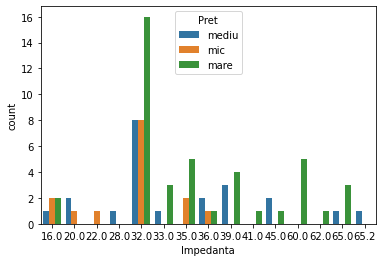

In [13]:
print(casti.shape)
casti.info()
# sns.countplot(casti['Pret'])
# sns.countplot(casti['Frecventa casti'],hue=casti['Pret'])
sns.countplot(casti['Impedanta'],hue=casti['Pret'])

In [14]:
f=['Pret','Brand','Frecventa casti','Frecventa microfon','Impedanta']
casti1=casti[f]

#impart setul de date: prima coloana de iesire(pret), celelalte 4 de intrare 
x=casti1[f[1:]]
y=casti1['Pret']

x.head(79)

,Brand,Frecventa casti,Frecventa microfon,Impedanta
0,1,20000,20000,39.0
1,1,20000,6500,22.0
2,1,20000,8000,45.0
3,1,20000,8000,45.0
4,1,20000,8000,45.0
...,...,...,...,...
74,6,40000,10000,32.0
75,6,22000,10000,32.0
76,6,40000,12000,35.0
77,6,20000,10000,32.0


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(63, 4)
(16, 4)
(63,)
(16,)


In [16]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam
model = DecisionTreeClassifier() 
# criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5
model.fit(x_train,y_train)
# from sklearn.metrics import confusion_matrix
# print('Confusion matrix ')

DecisionTreeClassifier()

In [17]:
p = model.predict(x_test)
p1 = model.predict(x_train)
rez = accuracy_score(y_test,p)
rez2 = accuracy_score(y_train,p1)
print(p)
print(p1)
print('Test accuracy: %.2f' % (rez*100))
print('Train accuracy: %.2f' % (rez2*100))

['mic' 'mare' 'mediu' 'mic' 'mare' 'mic' 'mediu' 'mare' 'mic' 'mare' 'mic'
 'mare' 'mare' 'mic' 'mare' 'mediu']
['mare' 'mare' 'mare' 'mediu' 'mediu' 'mediu' 'mic' 'mare' 'mare' 'mediu'
 'mare' 'mare' 'mare' 'mare' 'mare' 'mare' 'mediu' 'mediu' 'mare' 'mare'
 'mare' 'mare' 'mare' 'mediu' 'mare' 'mare' 'mare' 'mare' 'mediu' 'mic'
 'mare' 'mare' 'mic' 'mare' 'mic' 'mare' 'mare' 'mic' 'mic' 'mare' 'mic'
 'mediu' 'mic' 'mic' 'mare' 'mediu' 'mare' 'mediu' 'mic' 'mediu' 'mare'
 'mare' 'mare' 'mediu' 'mare' 'mare' 'mare' 'mare' 'mediu' 'mare' 'mare'
 'mic' 'mic']
Test accuracy: 62.50
Train accuracy: 88.89


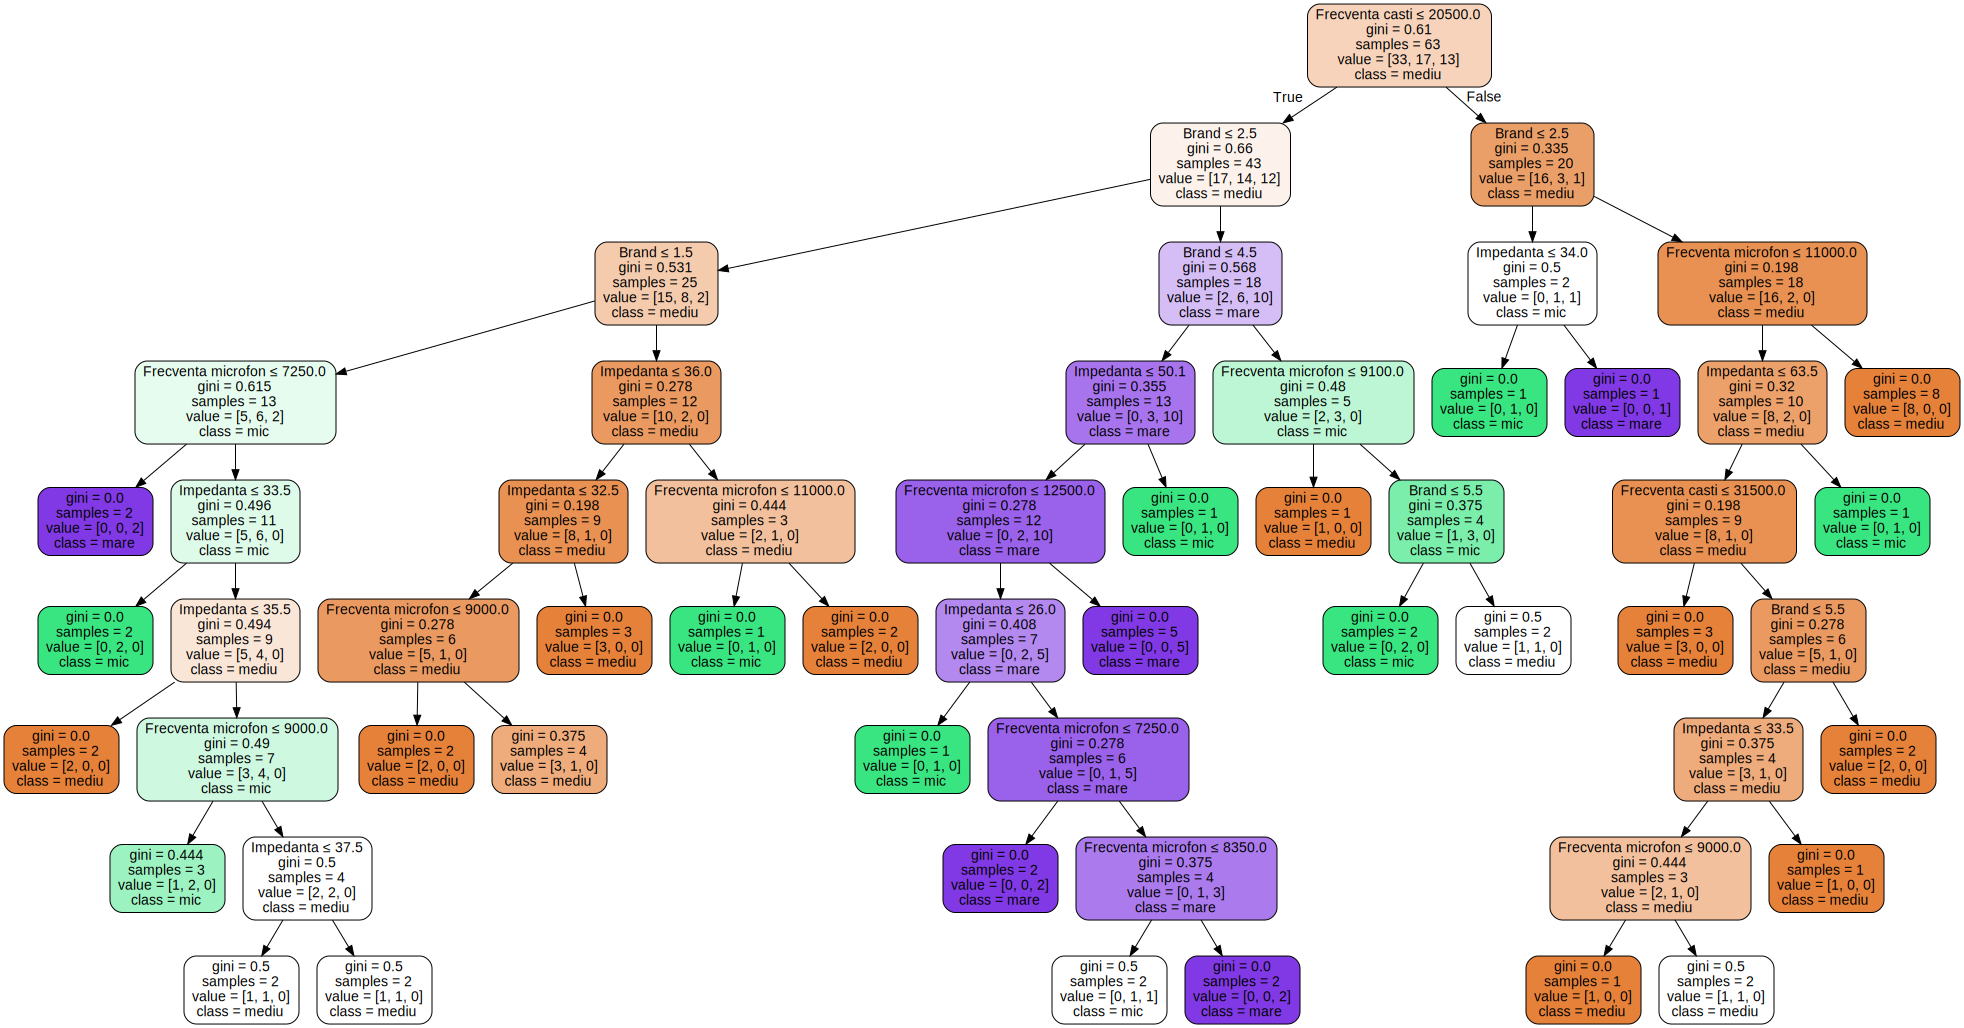

In [18]:
target = list(casti['Pret'].unique())
feature_names = list(x.columns)

from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

In [19]:
from sklearn.tree import export_text
r = export_text(model, feature_names=feature_names)
print(r)

|--- Frecventa casti <= 20500.00
|   |--- Brand <= 2.50
|   |   |--- Brand <= 1.50
|   |   |   |--- Frecventa microfon <= 7250.00
|   |   |   |   |--- class: mic
|   |   |   |--- Frecventa microfon >  7250.00
|   |   |   |   |--- Impedanta <= 33.50
|   |   |   |   |   |--- class: mediu
|   |   |   |   |--- Impedanta >  33.50
|   |   |   |   |   |--- Impedanta <= 35.50
|   |   |   |   |   |   |--- class: mare
|   |   |   |   |   |--- Impedanta >  35.50
|   |   |   |   |   |   |--- Frecventa microfon <= 9000.00
|   |   |   |   |   |   |   |--- class: mediu
|   |   |   |   |   |   |--- Frecventa microfon >  9000.00
|   |   |   |   |   |   |   |--- Impedanta <= 37.50
|   |   |   |   |   |   |   |   |--- class: mare
|   |   |   |   |   |   |   |--- Impedanta >  37.50
|   |   |   |   |   |   |   |   |--- class: mare
|   |   |--- Brand >  1.50
|   |   |   |--- Impedanta <= 36.00
|   |   |   |   |--- Impedanta <= 32.50
|   |   |   |   |   |--- Frecventa microfon <= 9000.00
|   |   |   |   |   

In [20]:
graph.save('graph1.jpg')

'graph1.jpg'